# TP 3

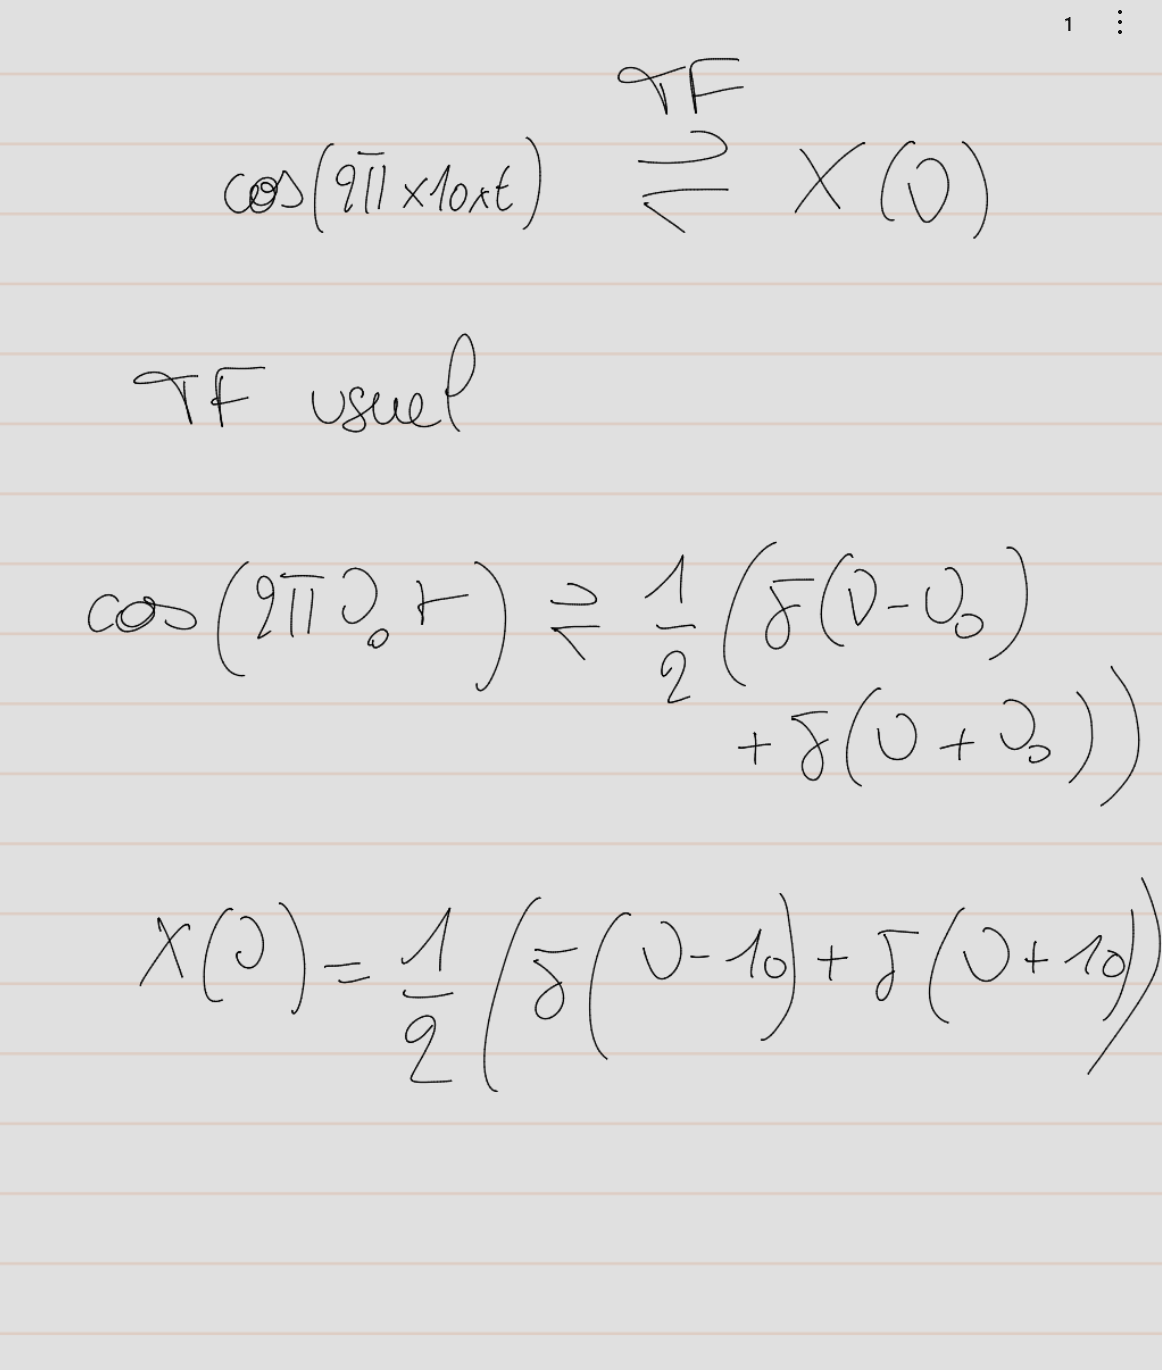

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft
from numpy.fft import fftshift
from scipy import *

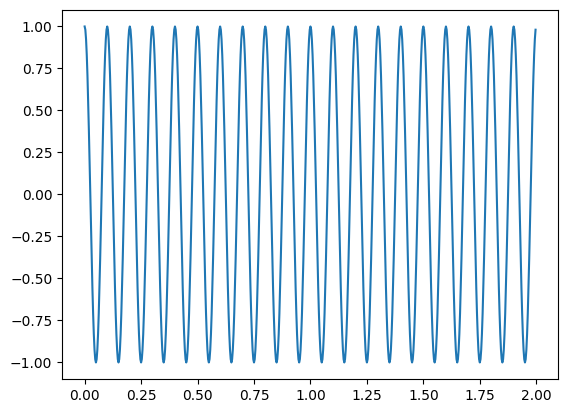

In [2]:
f0 = 10
fs = 1/32/f0
t = np.arange(0,2,fs)

x = lambda t: np.cos(2*np.pi * f0 * t )

s=x(t)
plt.plot(t,s)

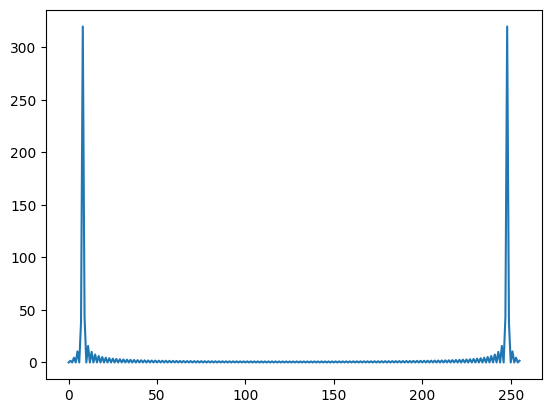

In [3]:
M = 256

def TFD(m,signal):
    n=1/M
    s = 0
    for i in range(len(signal)):
        s += signal[i]*np.e**(-2*1j*np.pi*i*m/M)
    return s

ms = np.arange(0,M,1)

sTDF = TFD(ms,s)
plt.plot(ms,np.absolute(sTDF))

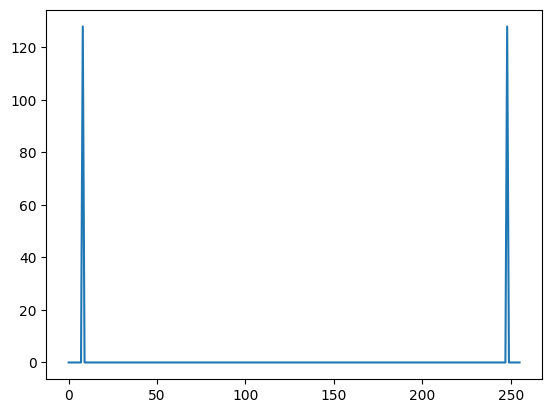

In [4]:
lfft = fft.fft(s,M)

plt.plot(np.absolute(lfft))

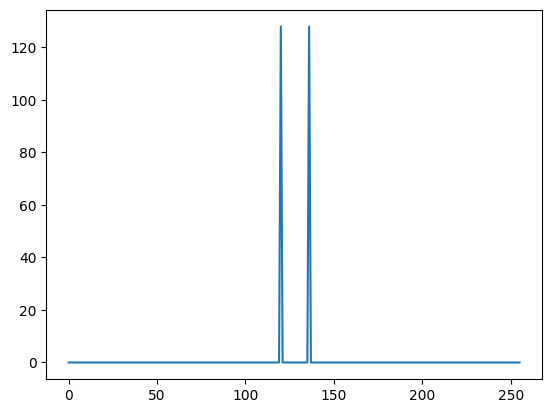

In [5]:
sfft = fft.fftshift(lfft)

plt.plot(np.absolute(sfft))

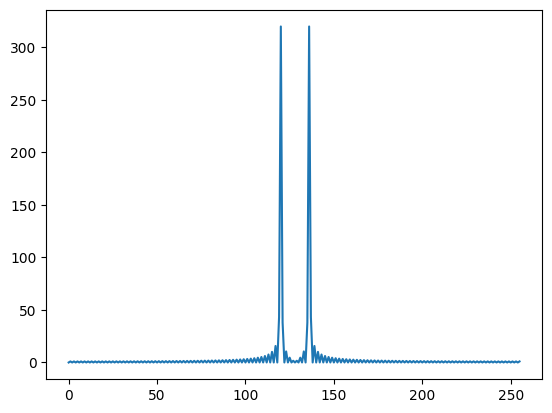

In [6]:
sfft2 = fft.fftshift(sTDF)

plt.plot(np.absolute(sfft2))

# Partie 2

In [7]:
f0 = 100
fs = 1/f0
t = np.arange(0,10,fs)

v = lambda t : np.sin(2 * np.pi * 1.12 * t)


In [8]:
def rect_fen(t) :
     if t < T :
         return 1
     else :
         return 0
T=1
rect = np.zeros(t.size)
for k in range(t.size) :
    rect[k] = rect_fen(t[k])

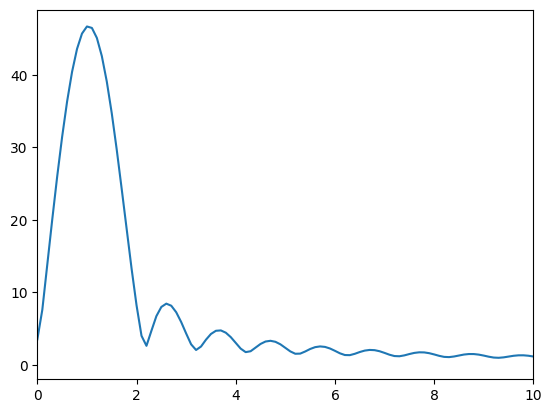

In [9]:
M = 1000
freq = np.arange( 0, M,1) *f0/M
plt.xlim([0,10])
plt.plot( freq, np.absolute( fft.fft( v(t)*rect ) ) )

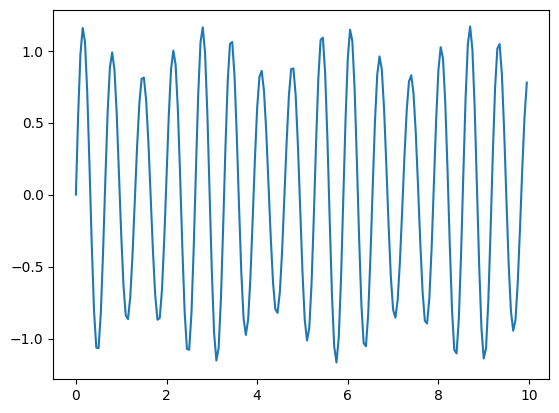

In [10]:
f0 = 20

t = np.arange(0,10,1/f0)

u = lambda t : np.sin(2 * np.pi * 1.524 * t) + 0.17 * np.sin(2 * np.pi * 1.867 * t)

plt.plot(t,u(t))

In [11]:
T=7
rect2 = np.zeros(t.size)

for k in range(t.size) :
    rect2[k] = rect_fen(t[k])


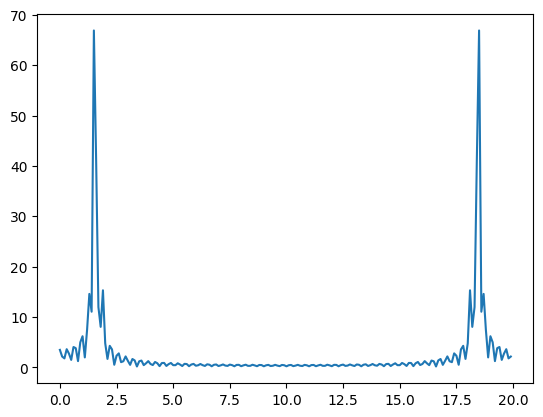

In [50]:
M = 200
freq = np.arange( 0, M,1) *f0/M
#plt.xlim([0,10])

fft_rect = fft.fft( u(t) * rect2 )

plt.plot( freq, np.absolute( fft_rect ) )

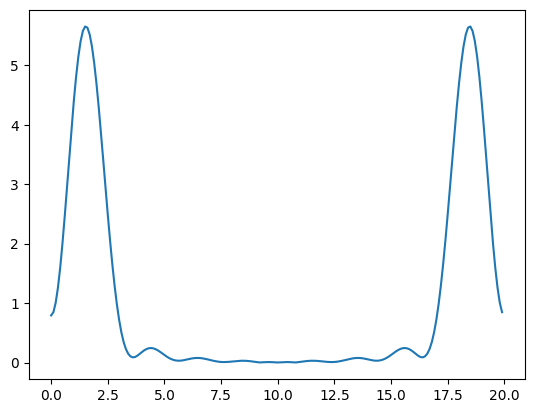

In [42]:
triangle = np.concatenate((signal.windows.triang(20) , np.zeros(180) ) )

fft_triangle = fft.fft( u(t)*triangle )

plt.plot( freq, np.absolute( fft_triangle ) )

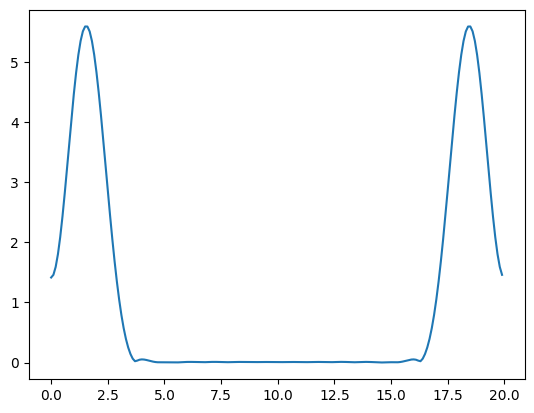

In [45]:
hamming = np.concatenate((signal.windows.hamming(20) , np.zeros(180) ) )

fft_hamming = fft.fft( u(t)*hamming )

plt.plot( freq, np.absolute( fft_hamming ) )

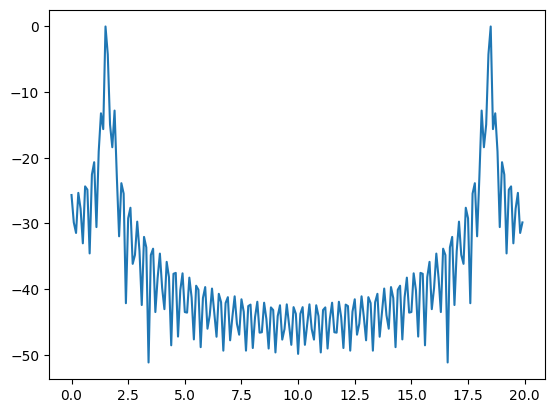

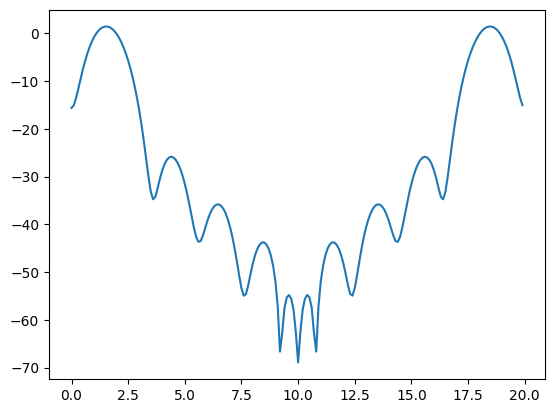

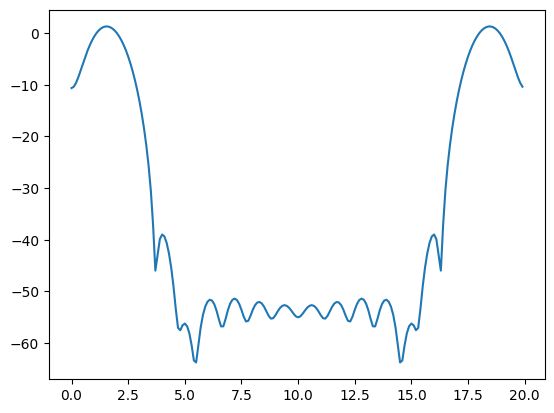

In [51]:
plt.figure()
plt.plot( freq, 20*np.log10(fft_rect/fft_rect.max()) )
plt.figure()
plt.plot( freq, 20*np.log10(fft_triangle/fft_triangle.max()) )
plt.figure()
plt.plot( freq, 20*np.log10(fft_hamming/fft_hamming.max()) )